In [190]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Load your data
data = pd.read_csv('/content/final_generated_data.csv')

In [191]:

data['Load_lagged'] = data['Load'].shift(24)
data['Load_next'] = data['Load'].shift(-24)
data = data.dropna()

In [192]:
# Define the features and target variable
features = ['Temperature', 'Humidity', 'ALLSKY_SFC_UVB', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA',
            'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M','year','month','hour','day','weekday', 'Inflation', 'Load_lagged']
target = 'Load'

In [193]:
# Initialize the scaler for features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
scaled_data

array([[0.24363347, 0.9601425 , 0.14042086, ..., 0.5209614 , 0.        ,
        0.74610131],
       [0.30508874, 0.79025923, 0.13758   , ..., 0.76854598, 0.98276587,
        0.71835752],
       [0.36976041, 0.63287342, 0.20158197, ..., 0.1470371 , 0.95276365,
        0.17583076],
       ...,
       [0.19224205, 0.84764834, 0.22006636, ..., 0.01827085, 0.99738519,
        0.14119538],
       [0.3430558 , 0.73853908, 0.00231085, ..., 0.65226681, 0.99924615,
        0.28146331],
       [0.14209539, 0.83657753, 0.00820803, ..., 0.0476632 , 0.99921865,
        0.30821792]])

In [194]:
# Initialize the scaler for target variable (Load)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(data[[target]])
scaled_target

array([[0.12398883],
       [0.31376698],
       [0.65944962],
       ...,
       [0.70459144],
       [0.66737092],
       [0.57535821]])

In [195]:
# Split the data into features (X) and target variable (y)
X = scaled_data
y = scaled_target
X,y

(array([[0.24363347, 0.9601425 , 0.14042086, ..., 0.5209614 , 0.        ,
         0.74610131],
        [0.30508874, 0.79025923, 0.13758   , ..., 0.76854598, 0.98276587,
         0.71835752],
        [0.36976041, 0.63287342, 0.20158197, ..., 0.1470371 , 0.95276365,
         0.17583076],
        ...,
        [0.19224205, 0.84764834, 0.22006636, ..., 0.01827085, 0.99738519,
         0.14119538],
        [0.3430558 , 0.73853908, 0.00231085, ..., 0.65226681, 0.99924615,
         0.28146331],
        [0.14209539, 0.83657753, 0.00820803, ..., 0.0476632 , 0.99921865,
         0.30821792]]),
 array([[0.12398883],
        [0.31376698],
        [0.65944962],
        ...,
        [0.70459144],
        [0.66737092],
        [0.57535821]]))

In [196]:
# Reshape input to be 3D [samples, timesteps, features] for LSTM
X = X.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [197]:
X_train, X_test, y_train, y_test

(array([[[0.24363347, 0.9601425 , 0.14042086, ..., 0.5209614 ,
          0.        , 0.74610131]],
 
        [[0.30508874, 0.79025923, 0.13758   , ..., 0.76854598,
          0.98276587, 0.71835752]],
 
        [[0.36976041, 0.63287342, 0.20158197, ..., 0.1470371 ,
          0.95276365, 0.17583076]],
 
        ...,
 
        [[0.27360796, 0.95436587, 0.13402134, ..., 0.11407944,
          0.        , 0.22692148]],
 
        [[0.28739394, 0.94167914, 0.13923406, ..., 0.75502688,
          0.00186337, 0.45673726]],
 
        [[0.31725726, 0.69874475, 0.17222642, ..., 0.20115272,
          0.99985683, 0.13724243]]]),
 array([[[0.5537719 , 0.83072893, 0.56831839, ..., 0.49969239,
          0.        , 0.78171471]],
 
        [[0.36291323, 0.78866266, 0.17837502, ..., 0.46997427,
          0.99778596, 0.17971039]],
 
        [[0.37424289, 0.79129311, 0.14499216, ..., 0.60979604,
          0.98495798, 0.21759196]],
 
        ...,
 
        [[0.19224205, 0.84764834, 0.22006636, ..., 0.01827085

In [198]:
# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Predict single value (Load)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [199]:

# Train the model
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
history = lstm_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Predict
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm

Epoch 1/150
799/799 [==============================] - 11s 8ms/step - loss: 0.0289 - val_loss: 0.0132
Epoch 2/150
799/799 [==============================] - 5s 6ms/step - loss: 0.0137 - val_loss: 0.0108
Epoch 3/150
799/799 [==============================] - 5s 7ms/step - loss: 0.0117 - val_loss: 0.0092
Epoch 4/150
799/799 [==============================] - 5s 6ms/step - loss: 0.0102 - val_loss: 0.0079
Epoch 5/150
799/799 [==============================] - 4s 6ms/step - loss: 0.0092 - val_loss: 0.0070
Epoch 6/150
799/799 [==============================] - 5s 7ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 7/150
799/799 [==============================] - 5s 6ms/step - loss: 0.0075 - val_loss: 0.0057
Epoch 8/150
799/799 [==============================] - 4s 6ms/step - loss: 0.0069 - val_loss: 0.0053
Epoch 9/150
799/799 [==============================] - 6s 7ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 10/150
799/799 [==============================] - 4s 6ms/step - loss: 0.0060 - val_l

array([[0.7358114 ],
       [0.62942415],
       [0.40083218],
       ...,
       [0.7442968 ],
       [0.60713863],
       [0.67010236]], dtype=float32)

In [200]:

# Inverse transform predictions and actual values
y_pred_inv_lstm = target_scaler.inverse_transform(y_pred_lstm)
y_test_inv = target_scaler.inverse_transform(y_test)
y_pred_inv_lstm,y_pred_inv_lstm

(array([[59562.965],
        [53388.664],
        [40122.066],
        ...,
        [60055.426],
        [52095.297],
        [55749.47 ]], dtype=float32),
 array([[59562.965],
        [53388.664],
        [40122.066],
        ...,
        [60055.426],
        [52095.297],
        [55749.47 ]], dtype=float32))

In [201]:
# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_lstm))
r2_lstm = r2_score(y_test_inv, y_pred_inv_lstm)
print(f'LSTM Model - RMSE: {rmse_lstm}, R²: {r2_lstm}')


LSTM Model - RMSE: 2776.564262807861, R²: 0.9612934133286632


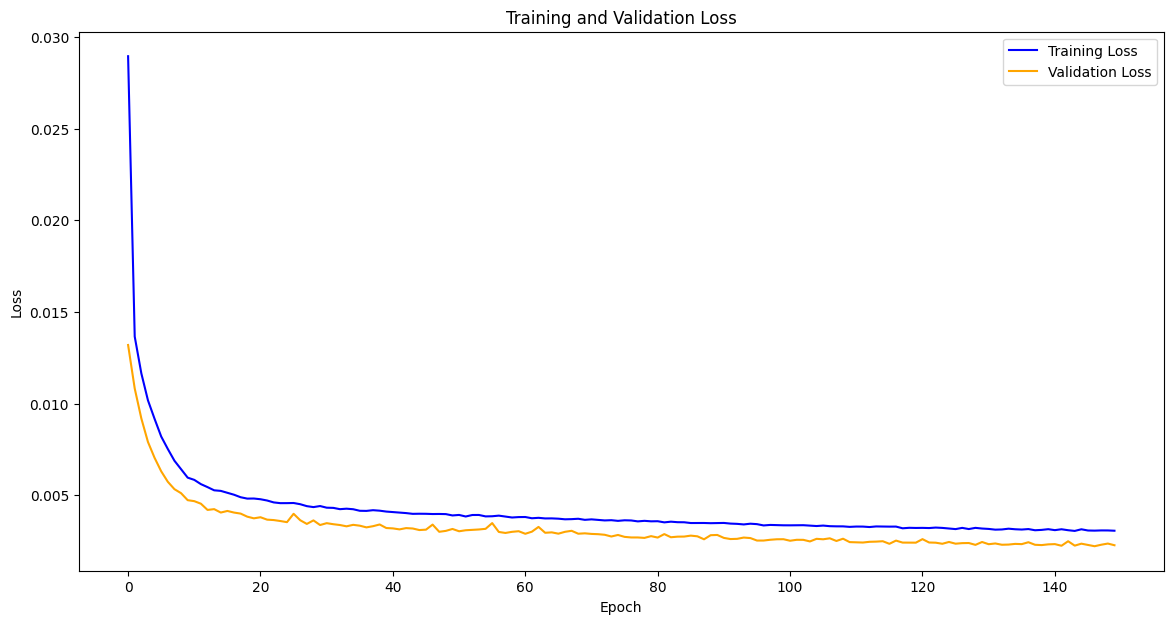

In [202]:
# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

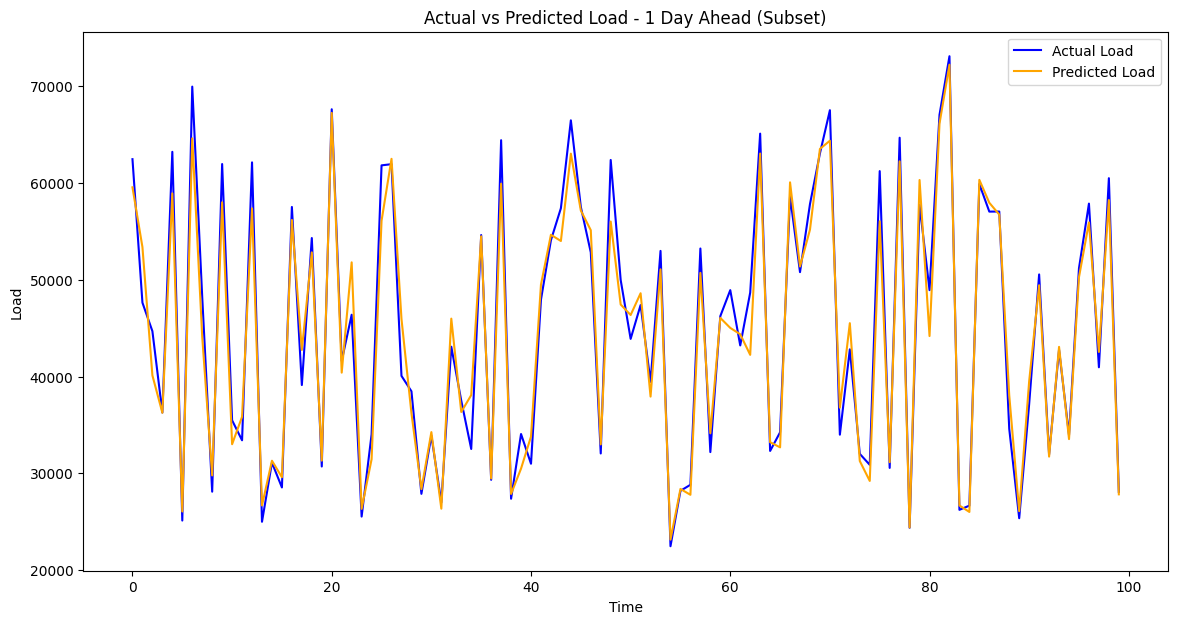

In [203]:
# Plot actual vs predicted load (a subset)
subset_size = 100  # Adjust as needed
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:subset_size], label='Actual Load', color='blue')
plt.plot(y_pred_inv_lstm[:subset_size], label='Predicted Load', color='orange')
plt.title('Actual vs Predicted Load - 1 Day Ahead (Subset)')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()